### Error plot with respect to $\beta$

In [1]:
using TracyWidomBeta,LaTeXStrings,Plots,TypedTables,LinearAlgebra

To compute the errors accurately, we computed the Tracy-Widom distribution functions for $\beta=1,2,4$ to 100 digits using $\texttt{Mathematica}$ and treated them as the ground truths.

In [2]:
TW1 = [0.9999999999999994562339560065771554465112482,0.9999999999999993471055305526516077992939555,0.9999999999999992163403216538473763258130546,0.9999999999999990597023297910420710473801414,0.9999999999999988721371176817230179616480552,0.9999999999999986476158494368018152708184652,0.9999999999999983789500376096568145289484911,0.9999999999999980575715798488940386724930958,0.9999999999999976732716806289632259964632096,0.9999999999999972138910908168308968891631450,0.9999999999999966649527276271683389757656191,0.9999999999999960092261234671238866204793390,0.9999999999999952262112516721912250036985596,0.9999999999999942915270402868089644231211646,0.9999999999999931761872534256034081525832843,0.9999999999999918457433249964212801022428040,0.9999999999999902592700917047628297370439764,0.9999999999999883681660977921860010028958594,0.9999999999999861147351236221528348614593028,0.9999999999999834305096963807349211939742094,0.9999999999999802342704247842326164697946958,0.9999999999999764297068868679501231257192369,0.9999999999999719026562878030379985835607060,0.9999999999999665178449567204962408427506625,0.9999999999999601150446920612633454223812720,0.9999999999999525045406729268397204042970980,0.9999999999999434617897554301966230783952276,0.9999999999999327211270330813131027317570513,0.9999999999999199683540527284232230952704810,0.9999999999999048320134541572366806674911400,0.9999999999998868731213584121594521352790242,0.9999999999998655730897731052559320714496035,0.9999999999998403195256904656493844039226838,0.9999999999998103895403558362060347474573776,0.9999999999997749301401399581501874937219874,0.9999999999997329351981193261346968684363297,0.9999999999996832184211885518810816368408118,0.9999999999996243816293669748177691221794948,0.9999999999995547775496846227018538300598149,0.9999999999994724661940553740007212009820291,0.9999999999993751637358790150884061314071913,0.9999999999992601826203044850928019936964881,0.9999999999991243614341436032415049159152323,0.9999999999989639828187407831854499706130369,0.9999999999987746774273630090919462900752967,0.9999999999985513116017435078877472226645535,0.9999999999982878560632229906842642468234569,0.9999999999979772324743391119798524608239374,0.9999999999976111342173383404933943133314828,0.9999999999971798171461291232381321620280937,0.9999999999966718553852421882300375341631088,0.9999999999960738564591345334759592808663598,0.9999999999953701291212602336176289286043401,0.9999999999945422961958891441415421474779846,0.9999999999935688435250526386542212710959055,0.9999999999924245947034171640720992413438361,0.9999999999910800996568765136374547905603219,0.9999999999895009232436031351863436422445156,0.9999999999876468178918587159375603642590033,0.9999999999854707617942813914133864652726316,0.9999999999829178413047289315641167095688385,0.9999999999799239528751374625033193837594626,0.9999999999764142960623432153716396963234548,0.9999999999723016247554185318046988204232613,0.9999999999674842187394773900888895840689316,0.9999999999618435319270663244880748014571216,0.9999999999552414669448145828211212562389009,0.9999999999475172181375056102750768093747350,0.9999999999384836163035528943762168460770722,0.9999999999279228984450081225794242332534204,0.9999999999155818143197087204437038476858507,0.999999999901165968416120781279076335,0.999999999884333280897857574210746756,0.999999999864686433817968213075220172,0.999999999841764149180208324264386131,0.999999999815031122882419131661703133,0.999999999783866412826952129954665993,0.999999999747550050084383899693571672,0.999999999705247608451173262824595220,0.999999999655992429485756139653568583,0.999999999598665156503789055257594363,0.999999999531970181342296709063605945,0.999999999454408551152191204127624542,0.999999999364246818132926612883710254,0.999999999259481241949329593848802780,0.999999999137796671405759753720525528,0.999999998996519337487418358789857038,0.999999998832562682640086166480691330,0.999999998642365229492363838826070175,0.999999998421819354269091497915562799,0.999999998166189673813816410479381942,0.999999997870019578090860198943391567,0.999999997527024239649783124827035994,0.999999997129968204868119079920812197,0.999999996670525415553326173254793800,0.999999996139119220004120536779624436,0.999999995524739605795036645842814902,0.999999994814734517767502508216777045,0.999999993994571708866480201337971404,0.999999993047567102846749758522726234,0.999999991954575120130261434744783748,0.999999990693635824150606924455055704,0.999999989239573077504855056395192320,0.999999987563537146404949583703176519,0.999999985632484348575850182261926867,0.999999983408585393121252665444270819,0.999999980848552999040869430191335809,0.999999977902878188827656315302660006,0.999999974514963320287901308583541800,0.999999970620138427263612276236744560,0.999999966144545770465096772332716901,0.999999961003875633473646482136993615,0.999999955101934314474690360091666778,0.999999948329022937567660802437659606,0.999999940560103112324900091203307141,0.999999931652722577802629143109742853,0.999999921444670745793911182306360783,0.999999909751330473058273076493935400,0.999999896362688405564466112345091756,0.999999881039961807870917978772497383,0.999999863511794872218397987737472335,0.999999843469972045144320506405636706,0.999999820564589860403644953731275712,0.999999794398622066855789985295219161,0.999999764521805424766312482037038193,0.999999730423765344190799460307732970,0.999999691526291479397234594106701019,0.999999647174663392024896736301914145,0.999999596627915364603265064707366368,0.999999539047917289839397837302495932,0.999999473487135176940044519725468520,0.999999398874920093505263124911735859,0.999999314002158181270663011660166353,0.999999217504096618555732152169575798,0.999999107841140914985351613581861046,0.999998983277397568721151172674876280,0.999998841856712737085399978937413821,0.999998681375932001959947360582221651,0.999998499355078375147580361828871782,0.999998293004115198779560646967835160,0.999998059185927353782901137665264024,0.999997794375117986372137030304573870,0.999997494612178578511851818675461955,0.999997155452547392411316850770808587,0.999996771910024869747201669674866637,0.999996338393964211453744232883126415,0.999995848639600841637452654498160351,0.999995295630825498252394516869299386,0.999994671514642013962287591743747617,0.999993967506482166090975921867900765,0.999993173785475991629483316671014332,0.999992279378696384346091728726214894,0.999991272033311315957440476128632701,0.999990138075485351509280816336206773,0.999988862254773962247431817054114176,0.999987427572649184207591608983013079,0.999985815093683143041296752008964290,0.999984003737796593312612669944665828,0.999981970051852648728425982200276034,0.999979687958741075566577542397449913,0.999977128481955679562242789117476946,0.999974259443516265098774378147708286,0.999971045132927253778272435066586123,0.999967445944697234626972360192624049,0.999963417981767454222815454997531087,0.999958912622012581531267208944630564,0.999953876044784114452358982721227536,0.999948248714265734664528616785646160,0.999941964816201063952030043677276692,0.999934951644338038955228288987533085,0.999927128932711036143558593615995332,0.999918408129652616768619949843265839,0.999908691609192147690296092906755707,0.999897871815259582333487046212296679,0.999885830333870536308325696914606061,0.999872436888224847102672793981489682,0.999857548251406670452865258239528803,0.999841007071131680835767388254224278,0.999822640600748211911412981539101539,0.999802259330466574453574447560542803,0.999779655512567001351827283484082063,0.999754601574124685199002384779790272,0.999726848410593522824774058126904525,0.999696123553412145777969977393911888,0.999662129204640650377962317111426628,0.999624540131508587241727350332156653,0.999583001413659071928174808844289103,0.999537126035815593908506926338855983,0.999486492318582913438745317831627315,0.999430641180127459561146955484150793,0.999369073221572426707477741677840575,0.999301245629095295449415453500409592,0.999226568885938186194045244145575910,0.999144403287842121156317239302955225,0.999054055255803146898300976478275431,0.998954773440529958477359091381174538,0.998845744613568109646532434043395452,0.998726089340754334419413836979998805,0.998594857434485435263892279708702016,0.998451023182239290934092819802352089,0.998293480349880595165502895620669975,0.998121036959530777357327178047538622,0.997932409843189929094160269942864764,0.997726218974878034400681826534047418,0.997500981585822635448052164272987803,0.997255106069169064689778683161647806,0.996986885682835733084481037651671442,0.996694492061488089134557517881341309,0.996375968551167182723318026859998178,0.996029223382887520671611481123641149,0.995652022704517912823432656385475916,0.995241983493480446890431501800926044,0.994796566376246850840194163916533787,0.994313068384276368755481386653676429,0.993788615679920480432996884749702524,0.993220156289910153859260017621254374,0.992604452888330569183048004820779008,0.991938075675462732999534262419822695,0.991217395403513738548934154481096678,0.990438576605046214603079186472648304,0.989597571084826992073197033353861339,0.988690111740814803362584358941313829,0.987711706785061580651832405280666046,0.986657634440371101129614766321766563,0.985522938193596370056929596132216362,0.984302422691411634172553405413544926,0.982990650369208891897215234970815561,0.981581938908378946579511019284617286,0.980070359621574257426558375913597985,0.978449736869540036893644229610795519,0.976713648616660446219441261995854685,0.974855428235412070708469537944284820,0.972868167672355664815510041964877237,0.970744722090033287188775244025304407,0.968477716100071121611543637507639246,0.966059551702814837077745638490565385,0.963482418047838108752792381984912116,0.960738303127558266705824006303138489,0.957819007512858070784862195089476666,0.954716160234942562600905712775724240,0.951421236911550734795618629507314451,0.947925580207993710851874067930745065,0.944220422714210888106092803326593282,0.940296912308038089280324682236259386,0.936146140062092829874280543445508687,0.931759170737039950271597665184555172,0.927127075887460151570831305790976935,0.922240969588076520821233249386957180,0.917092046767692724405590062577648863,0.911671624115877329474749892750445813,0.905971183503233829332405676480324680,0.899982417830096138516309537207075403,0.893697279190786384316090475263091043,0.887108029211300892708849335524441240,0.880207291387621863667557570763924591,0.872988105219993959753911461206876974,0.865443981905702908941444293636551141,0.857568961319432519583941261279579793,0.8493576699764820434363988986288055704,0.840805379640361633868732455336084991,0.831908066202951927462219381864676904,0.8226624684329530605312625481580599374,0.813066146157230909439828411556878186,0.803117537410396283047551400449453070,0.792816014061054007099870955015961411,0.782161935399181156790783058559179196,0.771156699148598453853747660896812099,0.759802789352053382579297217242965996,0.748103820564602748953944942744269468,0.736064577784319193924875958387847804,0.723691051548381471827602101367647138,0.710990467627839981775807881217770213,0.697971310766230396500614506335779918,0.684643341926136070944612749300942309,0.671017608534102375633174716136001259,0.6571064472482305342367670262324052242,0.642923478814479633815737645739317916,0.628483594627233926331839916492914740,0.613802934666984622693555078755959275,0.598898856552843645108759827259443386,0.5837898955197322834588884463779472662,0.5684957152090139403201815366892690288,0.553037049246469361748532331029255310,0.537435633672104419142863775915478603,0.5217141303814526855024201204874374233,0.5058960418367686110232115310885474880,0.4900056174076531203102660008166066934,0.4740677518029438352806880917040983797,0.4581078761577635790812146175648947045,0.4421518424399921030264486396048218532,0.4262258019375783973214940777283635764,0.4103560786804718081580580265632496239,0.3945690387369290266432313212767738658,0.3788909564019711647765832197347362006,0.3633478783642821383246968035318611476,0.3479654869953909492687261813777769617,0.3327689639502060857394721712550447809,0.3177828552996477406389838713798291603,0.3030309394331997397707982973677502366,0.2885360989708239356514245479098785633,0.2743201979092178576716310476127873226,0.2604039651964747285799199377840145773,0.2468068858817172915266707851822650101,0.2335471009224027244681675308709420538,0.2206413166522101033837759009128573262,0.2081047248174981702323722140520242318,0.1959509339813292443818066304075748119,0.1841919129723508057516852887837454685,0.1728379469230348425015545311719724620,0.1618976062997676888658809646802368330,0.1513777291781468037912019289934802552,0.1412834168628424157473753683761686934,0.1316180427949258309960275867481967069,0.1223832745331488644456948207814011648,0.1135791084418186073315307345922894326,0.1052039165691765418482755644900063479,0.0972545050590250177232592157478279209,0.0897261833070944845765072047369839582,0.0826128429544901646068483274097132085,0.0759070457054583398722899622197814896,0.0696001188673698884362202022377916578,0.0636822574386317512468629235163817578,0.05814263151627323749112266493397279711,0.0529694977599249027957885004568979990,0.04815031363315276404435479529238817204,0.04367185314659098600136396453402110398,0.03952032284961719367502283371167256868,0.03568147685765758919194275504789229896,0.03214072975947235145088730002698458184,0.02888326632151981219630797757594363366,0.02589414699301809795936697522302952578,0.02315840831366917866568960788786947807,0.02066115743405153026591529857775151948,0.01838766007416049776302277068752047488,0.01632342136613908482104289704655593234,0.01445425915053369167738592994136951457,0.01276636941909980872567822136217160720,0.01124638371902807539788749067897282001,0.00988141845135212543992676995569679693,0.00865911610830512217003459155081263308,0.00756767859879640052193659967066573281,0.00659589290651390698855816215989600713,0.00573314941022184879277274434643535527,0.004969453269699493781973411883721019078,0.004295429342830011276185734223763119559,0.003702321149260033731003294631502904701,0.003181984433753471855206896898115909739,0.002726875908063096061774781237611153499,0.002330037764288342802551127503993790014,0.001985078555940138367850999247004843777,0.001686151036139058862357553948935442948,0.001427927526527002966822475311126964559,0.001205573366683532860656497360477401955,0.001014718963292428173876320361072235972,0.0008514309222300965568807303377596829875,0.000712182706381785536611585217459154389,0.000593825218547489576386041875497876117,0.000493557663439514887715630382577006641,0.0004088989965853117848520104974137051492,0.0003376602219251092053354262673374771106,0.0002779177549167903698016390969780283419,0.0002279880247923635069587848036817386252,0.0001864034488864497378823072465499247257,0.0001518898741836767134525491920622414307,0.0001233455467879121754141624753560772074,0.0000998216391592272130579691803917138687,0.0000805043378378930103585141896504174906,0.0000646984710187027013237467987465344803,0.0000518126357021993080056550829732281768,0.0000413457681024840377673987218131329890,0.00003287508834018235605453398160479307782,0.00002604534094915828781955638045397668081,0.00002055924609469207376500650392788387548,0.00001616907233242450909131366573911080233,0.00001266923991171354220887133673362276340,9.88986372167849938212751198657812351e-6,7.69114667677254241884627808682084029e-6,5.958537338347785675167933365963747133e-6,4.598569585794827791635011420725776470e-6,3.535306925550657749977189509548525751e-6,2.707319325304773040821000882102924491e-6,2.065126079140782099389963362217853936e-6,1.569043971069013296455964289859855144e-6,1.187385761884248755825254825683375902e-6,8.949596573198966535327327900570873293e-7,6.71825829442818124735031270386830346e-7,5.022711868841127058530833897751504717e-7,3.739683724333024124642489566078063717e-7,2.772893765390230001617443338628318699e-7,2.047481756609755312324033362065167257e-7,1.505504313661665643104567888615329114e-7,1.102315260689756176451598001966495516e-7,8.03670789261943710603313716406976429e-8,5.83426011118800119897396968293664894e-8,4.217113812811737410721455072326077737e-8,3.034963512129376006663705116368266301e-8,2.174637777395455559616252747304389084e-8,1.551323481365466175028134592494843723e-8,1.101758645511638568488338163463272064e-8,7.78979282886399782505568060892184078e-9,5.48286259155969991341418402442407267e-9,3.841647403165839867302701195656282783e-9,2.679433579729949210787170232661789559e-9,1.860246565297193919200095214751381114e-9,1.285543309995633353129646145565496946e-9,8.84256501733680230380132448751753901e-10,6.053852267045620245762200014618066132e-10,4.12509581699890110771964011869954142e-10,2.797509586745019508214889183731807940e-10,1.888126554120396779120167673703988460e-10,1.268233560839591120494516341023103634e-10,8.47739963763414952107237648215581886e-11,5.63907658752386007618850276224945822e-11,3.732689754309671325864480483326986407e-11,2.458617704734792462985541102622676601e-11,1.611394822644036397508650288118218164e-11,1.050851651988367887842990880543821769e-11,6.81861208313511887805936772856088618e-12,4.402023091393591659049442055213312553e-12,2.827463728502907421379544115546194875e-12,1.806827921192191248278880143332523829e-12,1.148677722125863141739429845717069730e-12,7.26487063979165341750732784871745104e-13,4.570802760178107936756137266404152095e-13,2.860741451611702998490845271725505645e-13,1.781036795236060388215513327469812572e-13,1.102965557351044364157027679166550027e-13,6.79410735588786830045841434648633825e-14,4.16265935119327161950609410693837713e-14,2.536669972806725486285276274023753684e-14,1.537440464958466931838745376832422942e-14,9.26745536171501882916758789146098735e-15,5.55567926867849331940839413117657859e-15,3.312187440696375339600678215125675800e-15,1.963723475060961542733871102141239603e-15,1.157764023292227469762091271093994487e-15,6.78766915765746486009858795166321704e-16,3.957024902522726900455553237435895857e-16,2.293776002977056331390015744208707332e-16,1.322068420361133747399948420661539372e-16,7.57642211296356370725249636120826640*10^-17,4.31686331118705070126743816700597356*10^-17,2.445417027130868654007184957211640974e-17,1.377224252105211146237906244708037264e-17,7.71098896309184131052398012121494469e-18,4.291961168038138952520281909151982615e-18,2.374807221372263791334813463331842397e-18,1.306214205613093015728740639243348901e-18,7.14168183613441631749822261267855598e-19,3.88126446679242292645668743861576666e-19,2.096617485718794718974224462092846480e-19,1.125706013647086756853796120784475519e-19,6.00727024752921285786518510106510720e-20,3.186121549577405219366755557536911186e-20,1.679450012567889912075755605895194290e-20,8.79787894992829039298492067151495111e-21,4.580170330713497087895207208307841384e-21,2.369543111085332065303401479778564991e-21,1.218185808491679990896955718610164305e-21,6.22321776721015015942474153786493164e-22,3.159043602372266728377646777462798489e-22];

In [3]:
TW2 = [0.99999999999999999999999999999970286935056734,0.99999999999999999999999999999957162850397349,0.99999999999999999999999999999938283542575392,0.99999999999999999999999999999911143703696282,0.99999999999999999999999999999872155603289896,0.99999999999999999999999999999816185003979934,0.99999999999999999999999999999735889659911309,0.99999999999999999999999999999620777091013871,0.99999999999999999999999999999455863460332736,0.99999999999999999999999999999219766046324101,0.99999999999999999999999999998881992044079487,0.99999999999999999999999999998399087868192439,0.99999999999999999999999999997709173976197120,0.99999999999999999999999999996724193913864529,0.99999999999999999999999999995318929526803006,0.99999999999999999999999999993315444420424134,0.99999999999999999999999999990461068971345039,0.99999999999999999999999999986397268302261802,0.99999999999999999999999999980615649741321124,0.99999999999999999999999999972395842630706723,0.99999999999999999999999999960717845101964126,0.99999999999999999999999999944138433977464837,0.99999999999999999999999999920617032437452319,0.99999999999999999999999999887270547314670461,0.99999999999999999999999999840028457399368740,0.99999999999999999999999999773147927890090934,0.99999999999999999999999999678532652741193684,0.99999999999999999999999999544776690672538928,0.99999999999999999999999999355823267671199381,0.99999999999999999999999999089084906419862789,0.99999999999999999999999998712810508626108525,0.99999999999999999999999998182400503687589343,0.99999999999999999999999997435253669253424949,0.99999999999999999999999996383565972264276641,0.99999999999999999999999994904275140079203783,0.99999999999999999999999992825030291523560639,0.99999999999999999999999989904630214266387707,0.99999999999999999999999985805770395584082527,0.99999999999999999999999980057103794529266218,0.99999999999999999999999972000465593937682940,0.99999999999999999999999960717516733320769198,0.99999999999999999999999944927858486350021708,0.99999999999999999999999922847632139344629142,0.99999999999999999999999891993430266022675750,0.99999999999999999999999848910579045550119966,0.99999999999999999999999788796915216731165738,0.99999999999999999999999704982269861669076798,0.99999999999999999999999588208880822865875826,0.99999999999999999999999425637378179748855918,0.99999999999999999999999199474763715053393248,0.99999999999999999999998885082126395538455930,0.99999999999999999999998448366872091720154613,0.99999999999999999999997842191781375924756535,0.99999999999999999999997001434146676032941689,0.99999999999999999999995836192929127938100535,0.99999999999999999999994222457206661609497607,0.99999999999999999999991989297364736214153823,0.99999999999999999999988901297379786536340563,0.99999999999999999999984634479468475629737815,0.99999999999999999999978743337063398126775345,0.99999999999999999999970615728663952820145569,0.99999999999999999999959411212701578652829394,0.99999999999999999999943976812925151767910395,0.99999999999999999999922732047611790112885477,0.99999999999999999999893512135555457743086952,0.99999999999999999999853354339872219667507399,0.99999999999999999999798207067426075062089191,0.99999999999999999999722534123550658886073180,0.99999999999999999999618776779313003478455333,0.99999999999999999999476623170514698031260786,0.99999999999999999999282016845948478115074412,0.9999999999999999999901581245284590,0.9999999999999999999865195449688642,0.9999999999999999999815501204453019,0.9999999999999999999747684440975112,0.9999999999999999999655209529899467,0.9999999999999999999529210892987597,0.99999999999999999993576722437265693,0.99999999999999999991243202654461360,0.99999999999999999988071346446629559,0.99999999999999999983763431380003569,0.99999999999999999977917260037071481,0.99999999999999999969989950154261925,0.99999999999999999959249335520225628,0.99999999999999999944708795136624103,0.99999999999999999925039935794173580,0.99999999999999999898455704090577098,0.99999999999999999862554050444545340,0.99999999999999999814109015360268121,0.99999999999999999748791801015255475,0.99999999999999999660798692392422446,0.99999999999999999542355159113707123,0.99999999999999999383055520936978077,0.99999999999999999168984434742596532,0.99999999999999998881549160743643748,0.99999999999999998495928784457270445,0.99999999999999997979016600996310201,0.99999999999999997286692479109221705,0.99999999999999996360210304040615207,0.9999999999999999512141775769762668,0.9999999999999999346643679306838850,0.9999999999999999125731677351540281,0.9999999999999998831102002964937101,0.9999999999999998438490070292219855,0.9999999999999997915757814821446301,0.9999999999999997220376766238080116,0.9999999999999996296119034986998930,0.9999999999999995068711010246822327,0.9999999999999993440129967306968719,0.99999999999999912811268997807111353,0.9999999999999988421433199530512732,0.9999999999999984636945904967772001,0.9999999999999979632975329075880613,0.9999999999999973022366097750938566,0.99999999999999642969501943110803770,0.9999999999999952790335734751627294,0.9999999999999937629448734987246224,0.9999999999999917671489806949710166,0.9999999999999891421995949067728427,0.99999999999998569284486891504693337,0.99999999999998116422664827864536291,0.9999999999999752239963096558078613,0.9999999999999674391619690211276415,0.9999999999999572461447748621365591,0.9999999999999439120911674958663218,0.99999999999992648493789034155386631,0.99999999999990372902494814563149401,0.9999999999998740421578973191451987,0.9999999999998353488834388225969811,0.9999999999997849632965038718401196,0.9999999999997194128613615634652193,0.99999999999963421240125741782697691,0.99999999999952357446204336689568005,0.99999999999938003852383176040624811,0.9999999999991939968188221155436647,0.9999999999989530885603532538981163,0.9999999999986414268821871897525842,0.99999999999823861333413527847653791,0.99999999999771848288962755679140264,0.99999999999704750748206384805459998,0.9999999999961827673409905410085590,0.9999999999950693759047322221850501,0.9999999999936372146762227742897262,0.99999999999179679761940799960131210,0.99999999998943403878018272210494898,0.99999999998640363955608004666801379,0.99999999998252074071884262109294537,0.99999999997755039557373510107744414,0.9999999999711943104149346984966509,0.9999999999630741616717305972742488,0.9999999999527106296655209623015989,0.99999999993949707916422042021824956,0.99999999992266655770765610206264045,0.99999999990125046273781629260606219,0.99999999987402683420435120157289258,0.9999999998394557438736117347682740,0.9999999997955986558291705674121192,0.9999999997400179001051071061533386,0.99999999966965150338211309505667035,0.99999999958065752136873468890865371,0.99999999946822067366675736036634125,0.99999999932631244153938119880576823,0.99999999914739378950536388012573063,0.9999999989220472380019222060775898,0.9999999986385220565680885696763661,0.9999999982821727575687372713102205,0.99999999783476672106082532546592381,0.99999999727363151908562454567928224,0.99999999657060615061638170851565881,0.99999999569075273077736291664193359,0.99999999459077594411543064807234873,0.99999999321708646939223248425832028,0.9999999915034312559508418205877193,0.9999999893679975592937587999564785,0.99999998670987853272049824957046758,0.99999998340476534426710419959076575,0.99999997929970356706479529137764734,0.99999997420671918672311028844234966,0.99999996789508106161320832461726475,0.99999996008192099233552679219293573,0.99999995042087846668952981268650500,0.9999999384883732143267777102904833,0.9999999237670332799857976761827106,0.99999990562571750712712550709104330,0.99999988329546693742306184522828449,0.99999985584059718573491051208729478,0.99999982212400050555922725130165645,0.99999978076555878882243344450238076,0.99999973009237348909364037950903401,0.99999966807929128849089173771152748,0.99999959227794059756511715032673161,0.9999994997321884723265662615555163,0.99999938687757443186798030159907414,0.99999924942187048800955801730933007,0.99999908220344828276004410286146811,0.99999887902359666316260061653083091,0.99999863244831763259634509401965201,0.99999833357442593913231844454909879,0.99999797175397732955391654648576573,0.99999753427014164785654549864799439,0.99999700595660764830777602188667183,0.9999963687514440526889098521378260,0.99999560117503277821967350020777518,0.99999467772022161530782150030202503,0.99999356814120075815832796303362927,0.99999223662577609378653734386691618,0.99999064083367768458802582246656528,0.99998873078129043748656761851639608,0.99998644755071227476773383108824085,0.99998372179832113991150481781437053,0.99998047203505556262676889822418265,0.999976602647376336726311496665959283,0.9999720016243743360599610990140241,0.99996653795272080805911998965012147,0.99996005863712581508403333339519780,0.99995238529968808376957783754155525,0.99994331030700290347087723331834433,0.99993259236917004676063747817251482,0.99991995154994721240523324596710654,0.99990506362227410636792949572580748,0.99988755369830917292503013552363448,0.999866989058051386393123083595831666,0.999842871095656428486864043721922724,0.9998146262978115876334771737146291,0.99978159616413870437038685948460643,0.99974302597570326687782410509886434,0.99969805231449755917414779453066609,0.99964568923443845397536806697832488,0.99958481298320344747793815484149605,0.99951414517437530791318129086436889,0.99943223431115567010961978658966345,0.99933743556664570277892205585382652,0.99922788873170595532700548161894529,0.999101494250047245743621742070227839,0.998955887271837260245675964329911145,0.998788409672113595861139914553131360,0.99859607999906026178700289069702680,0.99837556134011726968946511327321306,0.99812312712132786333641783192455703,0.99783462488764003413191165568773830,0.99750543814938924937915311886514850,0.99713044642317037151188291440939305,0.99670398364396639887153947387650816,0.99621979517986495792590357379035566,0.99567099374098312797516306374754749,0.995050014540236699446850840384540798,0.994348570135085885056162994073101008,0.993557605455953045922232164610595577,0.992667253608036806442251761710235050,0.99166679311792749718382624239806231,0.99054460738371642211624184325919236,0.98928814717589229417750306331334691,0.98788389712467540512743297399659753,0.98631734721572382081795223774942877,0.98457297039824929991048380916058877,0.98263420748512296490529182446466546,0.98048346059088863276343849187645143,0.978102096407850044596089743723677019,0.975470460659461909975302999428033388,0.972567905090872172848814862701064469,0.969372828355262668349878249450813783,0.965862732128205670444214026412010792,0.962014293727226494426293793008594480,0.95780345642690983631739444809599274,0.95320553853823352391657195741500423,0.94819536216175476054605938905525878,0.94274740232571327887442497537043997,0.93683595698060094303901591516086044,0.93043533804061540754415175060190855,0.92352008333993706435491516925083741,0.91606518900928719650123545544380650,0.908046361378286712540267586312903094,0.899440287075599910407062762124089792,0.890224919536982368352909424241876292,0.880379779647887357051712553266204210,0.869886267750440283856316708834677446,0.858727983744051969694782495656929922,0.846891051515791333888497422657584222,0.83436444346322754933523594299601019,0.82114030043221390707880979505557122,0.80721424199928529247895828799668893,0.79258566169776164272620401037294969,0.77725800153321801167396685622091495,0.76123899997233672292575379956982297,0.74454090753316793312921926642993742,0.727180664167071818023742315904039212,0.709180032813844688821242031887026305,0.690565683840102696034681288559795521,0.671369225542344416534095327086832756,0.651627176512240197619472936550385720,0.631380876420726046623317111710812806,0.610676332673295697693703687155308341,0.589564001410871456465609979594149208,0.5680985024635560078428450914230224728,0.546338269088593005556957845375915694,0.52434513461476567339839088688968482,0.50218385944499036092636341567330997,0.47992160320530689800043878555144491,0.45762734813740488478179234612552375,0.43537128107702947907802033833091987,0.413224142505122554688080761371718196,0.391256552165870768847454270678287686,0.369538321581174588740553807623807910,0.348137764422685833918554949567029740,0.327121016103090953037278566532784072,0.306551374095921429715306092628935222,0.2864886703727091262457961239247390280,0.2669886869502331914963666812855182738,0.2481026248696757234667387999513819423,0.2298766359931581955465447575311066229,0.2123514258195901062911634358606339630,0.1955619341177650986804614827904712167,0.1795370985848360006310446235124866066,0.16429970500428924047126695253952331,0.14986632554659676655904978506941991,0.136247344979245317832575675576178811,0.123447072684565669501417426617270831,0.11146393657785845641430796399289671,0.100290753327304245070639573902095777,0.089915067750057726834227905429054208,0.0803195529393345480813718927988022907,0.0714824616016831176405323256288443780,0.0633781182799869584989900176433908434,0.0559774416245360351795522568982886855,0.0492484856600454849817701485864752253,0.0431569890787265544470547932122067903,0.03766692195623666388984243804198499651,0.0327410199169029631420107797751451874,0.02834129663698343552732296000290463550,0.02442952663287492759729267365657191075,0.02096769149276654325127495407444981496,0.01791838402949404846638209026312792933,0.015245166212007527593770563706580738,0.0129128781261011085137721998669613320,0.0108878965773404488105691482687187627,0.0091383432398732579065169857115534999,0.0076342434387664992031247085514569927,0.0063476377018357024460208209115859039,0.0052526491079020535145484628280986715,0.00432551017780042868234669993600437523,0.00354455359550920029634039650405926689,0.00289017140984955965264866761281369349,0.002344747559159293737445943166901285440,0.001892568594630828791921223854550519157,0.001519717369597376886459862504407315606,0.001213954232299596718521016327556578841,0.000964589931069064860123887902890797482,0.000762354036898338364272127396688777860,0.000599262232380874199360116038187408156,0.000468485330258251315383629475680463088,0.0003642223896787062398689015800238279532,0.0002815798116215560654205088207645872250,0.0002164578317339570010039716134803532426,0.0001654454008817060685560051481122314039,0.000125724059679525299903249623754404660,0.000094981078721558182994161449391330576,0.000071331853944087341088148060862567238,0.000053251316805492097432484613994485412,0.0000395139399741869590208820530957239955,0.0000291417875464184779559609512921404701,0.0000213599698474111576987229932670892233,0.0000155588111996301877070134983272421573,0.00001126201887418274015305299532597178713,8.10014691390734123570568049892163304*10^-6,5.78867397252676539895524020793379961*10^-6,4.110054507736757339849374051788543*10^-6,2.899152907740745840254085301130080589*10^-6,2.031526374597919552600200906614940985*10^-6,1.414081268862618902073386782571652044*10^-6,9.77686450112423432912933570078912375*10^-7,6.71383878986541016767449376830636069*10^-7,4.578899105545040485090937978641801456*10^-7,3.101293444111841051948650641384289270*10^-7,2.085878663349801906719870354801751645*10^-7,1.393068237258114651548833886815570400*10^-7,9.237738904321291746112678013780895242*10^-8,6.08193395245629889544825832903741247*10^-8,3.975330313442857057447241968145523*10^-8,2.5794851307789022410993158428065457*10^-8,1.66147537863521369240233024055007786*10^-8,1.06225467412445106877418846129809452*10^-8,6.7407782478617795710262134206109028*10^-9,4.2453242784591771888538295831841106*10^-9,2.65340736501658602911478900405508567*10^-9,1.64574300231219816082105978446329837*10^-9,1.012879836611529756097259690033866505*10^-9,6.18535247657101039936883390428185439*10^-10,3.74761008035561223545047282892370946*10^-10,2.252685489259147031411788292643571720*10^-10,1.343308442018510314614452719671306546*10^-10,7.9460766307273416834325479703711477*10^-11,4.662344716963896666926853336500071232*10^-11,2.713335170078879794117591685253207402*10^-11,1.566111745018843843219810733622505793*10^-11,8.96468627206015312793168017511145400*10^-12,5.088775601479399158472386469198007281*10^-12,2.864376953641525945300859927969287183*10^-12,1.598668869878906722580460273326782869*10^-12,8.84649333873614130022036136098747348*10^-13,4.853341977902429894681281797297567599*10^-13,2.639614767246062259530837959039724801*10^-13,1.4231246350087920323156900616615841547*10^-13,7.605379181197913057528809527232939235*10^-14,4.0285352783149488936360890449877413*10^-14,2.114923452886899975804206912870243*10^-14,1.10036339948575439269362387965256612*10^-14,5.6734135293529922430544032754764871*10^-15,2.89862734121458372762210533505604830*10^-15,1.46741444679730924928266634956573751*10^-15,7.36035022832541687594756478334161810*10^-16,3.65765109256283696089127035000124886*10^-16,1.800681902089248121562663647324653674*10^-16,8.78163691724009225536141761304400816*10^-17,4.24219406035905811539606322160142043*10^-17,2.029808134774723310045800764898150191*10^-17,9.61926023443806914915900326647021912*10^-18,4.514643003995683270661412226535743409*10^-18,2.098326356813695334579010068815458702*10^-18,9.657469975816453247063270687824558403*10^-19,4.401160786193092335339948649922051385*10^-19,1.985900425763657476861201334379488761*10^-19,8.87170103503467417641391855254327460*10^-20,3.923632763971210239644229524631061461*10^-20,1.717808161312865701948520968175470077*10^-20,7.444553527846986992744848502424014489*10^-21,3.193398883995186862200868819576214651*10^-21,1.3557856414815268131100196530340083342*10^-21,5.696722598906334767403668768855414487*10^-22,2.3687985438981351167568457920790435854*10^-22,9.747046305277220447740347974076480841*10^-23,3.9685568962885528322250710928336121261*10^-23,1.5987468679232989355643443802520014389*10^-23,6.3721670176048496573483601355453102*10^-24,2.5126255796452414897958341460060130*10^-24,9.8010909884321844723102076632118590*10^-25,3.7818118507731703943026874993353506*10^-25,1.44336810730704342623552014737514313*10^-25,5.44852335116169587656347851317087985*10^-26,2.03412618220821613522643077695764370*10^-26,7.5101249338245674975948975583240022*10^-27,2.74194961004314780464535455101983952*10^-27,9.89891625556136511198185767454027447*10^-28,3.533495495991654368532907295901589554*10^-28,1.247047463146967795608909692269443009*10^-28,4.351067412981999549597573756745136461*10^-29,1.500775970159965458189868711655810728*10^-29,5.11700672929013668797159338515881783*10^-30,1.724523090394892772755646952994948774*10^-30,5.744441138785222690925901058220806776*10^-31,1.891146346719754168793321946694469695*10^-31,6.15281584785220404220975657308675279*10^-32,1.978185256531839296181982298683977570*10^-32,6.284592316047947937954500943651471484*10^-33,1.972773411331448441553533187505190908*10^-33,6.118431321533854161989212326276330260*10^-34,1.8747294518594622637370619582982693386*10^-34,5.674735000457657612018081249790016212*10^-35,1.6968126046991382313383687452517761191*10^-35,5.011599214201208322290784982746603692*10^-36,1.4619946398556639804307528671471305288*10^-36,4.212259009651785311247682839301912149*10^-37];

In [4]:
TW4 = [1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,1.0000000000000000000000000000000000000000000,0.99999999999999999999999999999999999999999999,0.99999999999999999999999999999999999999999999,0.99999999999999999999999999999999999999999998,0.99999999999999999999999999999999999999999997,0.99999999999999999999999999999999999999999994,0.99999999999999999999999999999999999999999990,0.99999999999999999999999999999999999999999982,0.99999999999999999999999999999999999999999968,0.99999999999999999999999999999999999999999943,0.99999999999999999999999999999999999999999899,0.99999999999999999999999999999999999999999822,0.99999999999999999999999999999999999999999685,0.99999999999999999999999999999999999999999444,0.99999999999999999999999999999999999999999019,0.99999999999999999999999999999999999999998270,0.99999999999999999999999999999999999999996956,0.99999999999999999999999999999999999999994649,0.99999999999999999999999999999999999999990604,0.99999999999999999999999999999999999999983524,0.99999999999999999999999999999999999999971144,0.99999999999999999999999999999999999999949523,0.99999999999999999999999999999999999999911812,0.99999999999999999999999999999999999999846118,0.99999999999999999999999999999999999999731820,0.99999999999999999999999999999999999999533207,0.99999999999999999999999999999999999999188513,0.99999999999999999999999999999999999998591050,0.99999999999999999999999999999999999997556763,0.99999999999999999999999999999999999995768539,0.99999999999999999999999999999999999992680713,0.99999999999999999999999999999999999987355560,0.99999999999999999999999999999999999978183670,0.99999999999999999999999999999999999962406402,0.99999999999999999999999999999999999935301385,0.99999999999999999999999999999999999888795136,0.99999999999999999999999999999999999809103011,0.99999999999999999999999999999999999672719861,0.99999999999999999999999999999999999439617865,0.99999999999999999999999999999999999041721512,0.99999999999999999999999999999999998363406636,0.99999999999999999999999999999999997208547921,0.99999999999999999999999999999999995244910916,0.99999999999999999999999999999999991910438762,0.99999999999999999999999999999999986255535150,0.99999999999999999999999999999999976677989656,0.99999999999999999999999999999999960478071630,0.99999999999999999999999999999999933112807176,0.99999999999999999999999999999999886947750336,0.99999999999999999999999999999999809170490798,0.99999999999999999999999999999999678307732150,0.99999999999999999999999999999999458419340103,0.99999999999999999999999999999999089433287923,0.99999999999999999999999999999998471078657308,0.99999999999999999999999999999997436213171614,0.99999999999999999999999999999995706606333996,0.99999999999999999999999999999992819740060379,0.99999999999999999999999999999988007799100462,0.99999999999999999999999999999979997904143928,0.99999999999999999999999999999966682792706061,0.99999999999999999999999999999944578695525837,0.99999999999999999999999999999907934155542122,0.99999999999999999999999999999847267116391343,0.99999999999999999999999999999746966901620421,0.99999999999999999999999999999581368950992687,0.99999999999999999999999999999308338826297296,0.99999999999999999999999999998858800045114615,0.99999999999999999999999999998119665998503113,0.99999999999999999999999999996906061581903329,0.99999999999999999999999999994916179122396477,0.99999999999999999999999999991658018726257419,0.99999999999999999999999999986330675567337695,0.99999999999999999999999999977632253775937058,0.99999999999999999999999999963449511138041487,0.99999999999999999999999999940357150652738179,0.99999999999999999999999999902811196296776691,0.99999999999999999999999999841851466429629332,0.99999999999999999999999999743017476711972308,0.99999999999999999999999999583005917863249342,0.99999999999999999999999999324317827043552658,0.99999999999999999999999998906699193926668509,0.99999999999999999999999998233474650207647471,0.99999999999999999999999997149760035931692369,0.99999999999999999999999995407780305609692408,0.99999999999999999999999992611744748141153619,0.99999999999999999999999988130362987179566769,0.99999999999999999999999980958217784539184666,0.99999999999999999999999969496431963309101883,0.99999999999999999999999951206176170739420231,0.99999999999999999999999922062138432262399608,0.99999999999999999999999875691799087937915850,0.99999999999999999999999802021982972243326763,0.99999999999999999999999685153936002265130816,0.99999999999999999999999500032380360694217492,0.99999999999999999999999207232227217163405546,0.99999999999999999999998744812029359297701821,0.99999999999999999999998015603826116474257115,0.9999999999999999999999686741424429,0.9999999999999999999999506223222602,0.9999999999999999999999222841553511,0.99999999999999999999987786565742915,0.99999999999999999999980834796863655,0.99999999999999999999969971438897698,0.99999999999999999999953021500934145,0.99999999999999999999926615336526627,0.99999999999999999999885540709147022,0.99999999999999999999821748016351696,0.99999999999999999999722825511345460,0.99999999999999999999569665990138496,0.99999999999999999999332902106406115,0.99999999999999999998967469506088449,0.99999999999999999998404328313472072,0.99999999999999999997537878811476704,0.99999999999999999996206863885771632,0.99999999999999999994165436014870415,0.99999999999999999991039397575723458,0.99999999999999999986260128942068294,0.999999999999999999789649979230315231,0.99999999999999999967847503343885005,0.99999999999999999950932170000592103,0.999999999999999999252369935496088674,0.99999999999999999886268139043525035,0.99999999999999999827264849346396271,0.999999999999999997380730554677099389,0.999999999999999996034680626607861840,0.99999999999999999400661257169853315,0.999999999999999990956004418879529379,0.999999999999999986374898710694560794,0.999999999999999979506878006685161954,0.99999999999999996922748051684338754,0.99999999999999995386802341503400113,0.99999999999999993095652228556502754,0.99999999999999989683738801509792417,0.9999999999999998461142026889658432,0.99999999999999977083476933247821484,0.99999999999999965930143325383550212,0.99999999999999949433759054443860427,0.9999999999999992507665112937601848,0.99999999999999889175142946634153376,0.99999999999999836349257473760923839,0.99999999999999758755806232653743521,0.99999999999999644981398259587640304,0.9999999999999947844761832586126519,0.99999999999999235117811711862487538,0.99999999999998880206009832400941416,0.99999999999998363462965346789930283,0.99999999999997612437295347024995310,0.99999999999996522860847508339027234,0.99999999999994944958139588316074992,0.99999999999992663990657308421080513,0.99999999999989372663471292302878242,0.99999999999984632068996899897955113,0.99999999999977816517583017913049883,0.99999999999968035765451864540835183,0.99999999999954025603693272061891886,0.99999999999933994253287444386374861,0.99999999999905407160747168163181186,0.99999999999864686118441856056207437,0.99999999999806789481369471569157518,0.99999999999724627724284461710992519,0.99999999999608251475392205046091451,0.99999999999443725856960459209295048,0.99999999999211573290279904770670811,0.99999999998884623983528264591163769,0.99999999998425055252280735970590680,0.99999999997780322487650263993637716,0.99999999996877579178752413185510645,0.99999999995616041916954953850264186,0.99999999993856566901955559595252893,0.99999999991407451553983471945220668,0.99999999988005138001399033594534625,0.99999999983288047800035684078752927,0.99999999976761184538168823224022854,0.99999999967748357933060135305102412,0.99999999955327851334631980953932992,0.99999999938245999033793480299420538,0.99999999914801363781106785782307554,0.99999999882689884640179283556011897,0.99999999838798342649723521334974391,0.99999999778929565628869700921957256,0.99999999697437708868137549393141974,0.99999999586745383361526984142443399,0.99999999436705952408098357656745019,0.99999999233763472854569583120636129,0.99999998959848884686987902621935201,0.99999998590933363353263085782734235,0.99999998095137266332994287600875015,0.99999997430264624641160667806333060,0.999999965405971726077376243681955007,0.99999995352736668672887210385293406,0.99999993770227538788350767486075993,0.99999991666621013272085711957610563,0.99999988876553726354828990403187301,0.99999985184304371879250110495056447,0.99999980309156894472269205716449143,0.999999738867324409031174188213517932,0.999999654452485476498271897836673431,0.99999954375415375190450000682852944,0.99999939892376607465741362206505098,0.99999920987737006595739039709917216,0.99999896369278237455218309421503512,0.99999864385436662007893807941935185,0.99999822930987028049558637997224214,0.999997693296284892032909231516112012,0.999997001882868719394277300200528717,0.99999611216910907429289136222909650,0.99999497006330557734181026382725108,0.99999350755342191176194364236389218,0.99999163936567673464128031218064162,0.99998925888782528408907340944784272,0.999986233213038686112816415527327917,0.999982397136563239154163328874601192,0.999977545910826046791526061177248687,0.999971426535297782001983853532108356,0.99996372732526430845318112465846004,0.99995406546884314030598680091203269,0.99994197224439517201447632350647148,0.99992687553138670814707784872867047,0.99990807920742060596730558823627633,0.999884738983494730251496159592891145,0.999855834189764224729953886317675475,0.999820134986710746886750564499521982,0.999776164443549252323203351851680339,0.99972215489921882234831193777146378,0.99965599800411566454108613919152330,0.99957518783597364910957442315168476,0.99947675649455062834146979876751319,0.99935720161101518229419429822306930,0.999212405263486828845357994254588388,0.999037543874685289732308819587168126,0.998826988785885332414521511141112966,0.998574197358168540216704808958800173,0.998271594651955395363050898605871760,0.99791044598322256287638249483892677,0.99748072095319776847419042702471916,0.99697094990018992113952650142973531,0.99636807412867322150414421000887281,0.99565729173112447436515647693887140,0.994821901329520686972869692808672984,0.993843146620306627477539446817459358,0.992700065200457477607643190118021743,0.991369345770992131281641454985500012,0.989825198442228379195260636999291433,0.988039243482599093052418658229581845,0.98598042443640014996916422392954407,0.98361495205801678684865097927350606,0.98090628594008129523779048141627802,0.97781516101684363451624823127094117,0.97429966626591769851192325531048269,0.970315382874707062569213712899607828,0.965815588845931903446181797982987454,0.960751536455712867464989893607130663,0.955072808117744372184824919408524877,0.948727755024686651814656633765006327,0.941664021418140876427164297155874163,0.933829155477520675317859488784218284,0.92517130562505435879512897451776979,0.91563999854347722899099732012931609,0.90518699243591363560359194037372313,0.89376719608304823464532039335561026,0.88133964114816500201063569445629588,0.867868492040864930350681042711154026,0.853324074586275552033149120425932233,0.837683901882903488457639363793802104,0.820933673203354464090840861218878901,0.803068219737366969204033022516814539,0.784092369534571846490032569485275471,0.764021703306204374390494307233214057,0.74288317290700184921238507968753145,0.72071555543476774116199035631706766,0.69756971801992253586569497463177580,0.67350867155861119546647831940419714,0.64860739585611342200894726978245224,0.622952423831377404760536741181946333,0.596641178478643905698340504050290000,0.569781063029834872111036574278929455,0.542488312007220349308752504653713958,0.514886618355065001727649887055026619,0.487105559314694501801446511775633069,0.459278850861826174193980885974563151,0.431542467052211147567403736865608102,0.404032666222507911372848916931973687,0.37688397039103913836949942561708137,0.35022714715875180481336797425383545,0.32418724473786952539137893354882182,0.298881730313103267290665215609279165,0.274418779721507123735969986815181117,0.250895762456799316421169467361892386,0.228397960379736015180289093358420433,0.206997551445460725372884788223096101,0.1867528815116403818741290886889521013,0.1677080381980468483385441578460106937,0.1498927312039488322053658096773952788,0.133322473854686134203732428240296698,0.117999051348231093719732267755194538,0.1039112525947342543049695900228386402,0.0910358350378225399490819061691071844,0.0793386857104610179639717221469589369,0.068776137233789565387397366206105592,0.059296394655446436113328567193315760,0.050841027997203137562329481961074300,0.0433464861042429944940624289985202985,0.0367455897402295536959101189603416843,0.0309689656594427765130922339142630334,0.0259463883555455810175440629682541271,0.0216080020386443091463828355798757182,0.01788540180655447443631369160936909313,0.01471255962590083097656908121517121830,0.01202658731067354558239509365398976446,0.00976833489686882902982304007008104474,0.00788282842196241343931729925179300612,0.00631955594035664133112365976560997580,0.00503261451241287477407482824001111675,0.00398073382711339744185000598241628354,0.0031271940462871440882568478288093612,0.00243965643296878894001041614039364309,0.0018899254324764336182313437681424666,0.00145366022997162512139255717536714890,0.00111005255248146379384340601747526754,0.00084148576754575874404030257824090354,0.000633188306532534370769902908350028067,0.000472892251913636078074190601053553063,0.000350505702982365023134360503351125916,0.00025780538211471808846676801797258923,0.0001881539492267090732802423124815026149,0.0001362447171396653600619500781595330352,0.0000978749435509798022418302165091425292,0.0000697476335990198465059743427883981237,0.0000493008200344252386630963484075513619,0.0000345625808913992525088934128818853721,0.00002402958196568089904812158306582367173,0.0000165666613064406103056159964185894102,0.00001132486992987990170209689777176196750,7.6754111828330982663802252027799392*10^-6,5.157046489617916766936520620576014*10^-6,3.4347268146535574380229639342212516*10^-6,2.26744061982776150694362114273485953*10^-6,1.48351875148470847051737822198583324*10^-6,9.61887760878066803309873899913290536*10^-7,6.18003394022785325179913675886555120*10^-7,3.93417162414488133915007411176967263*10^-7,2.48126194637789543645011539772576506*10^-7,1.550278437365931508074237668433857425*10^-7,9.59456954876828820202751310224331757*10^-8,5.88140265734480473237011145534415169*10^-8,3.570564683970684983230723575996356881*10^-8,2.146616316361360036267648289821770853*10^-8,1.277892859004824435975652029566336187*10^-8,7.53213220420747994590211010041540431*10^-9,4.39527331715786665837829915561593748*10^-9,2.538980106549454559270824386868499019*10^-9,1.451774540090463045748406565965334511*10^-9,8.21611550585903486039282055851337586*10^-10,4.601743462431980999299708305098263*10^-10,2.55051459506997768054731160672035310*10^-10,1.39876193533937406859800060882425*10^-10,7.5898192006905742163699319151708070*10^-11,4.0742882043461917689427394540017273*10^-11,2.16354443230861058663418489310448894*10^-11,1.136409143478486390620892608187835398*10^-11,5.90363540414481010844550304520568925*10^-12,3.03306231405680821820512518616659883*10^-12,1.540924023995645086253955184417459536*10^-12,7.74070128466404255839477970182126770*10^-13,3.84449841087394488917552796314297186*10^-13,1.88764564678936844712722887754631360*10^-13,9.16186274340952027081641688171762103*10^-14,4.39532242133767474862922686378960676*10^-14,2.084022803950717497507971675164815408*10^-14,9.76517632487519813906106834594411268*10^-15,4.521522789342388090637760957741167994*10^-15,2.068604541437963154284885053818590679*10^-15,9.35016799980738635535974215236948528*10^-16,4.175145087552393646035848913735058735*10^-16,1.841598247352035007492483043861642480*10^-16,8.02324759028345907719233722180132771*10^-17,3.4522170754435544651293914888489178*10^-17,1.4668946660089168574880628904517725*10^-17,6.1547811614042480303058589239751108*10^-18,2.54975549260418838641661692933525381*10^-18,1.04283454819407372913253013308695809*10^-18,4.21037983729119489682007224809701261*10^-19,1.67792957564709697236716230479423795*10^-19,6.59979948359858725546306709795178981*10^-20,2.561844115701131950819166116549397821*10^-20,9.81311185382152492690836957133064023*10^-21,3.70915840224167423163711084824050404*10^-21,1.383479083073756827797342556192985923*10^-21,5.09299454841028495897363920910045949*10^-22,1.85124793297854723667357601266192653*10^-22,6.65022848553381255330727665420138347*10^-23,2.365033346976958021651612665032375032*10^-23,8.35309439151679774402895992531187860*10^-24,2.94703764394189792768107676445040473*10^-24,1.04984682640965828215346779058414943*10^-24,3.85711741753022520740573110944238278*10^-25,1.532596796626609027885902078788058400*10^-25,7.59933962278233322720341633666351078*10^-26,1.751417200303381040791467117973576211*10^-25,-6.206817695363794496350108125220917905*10^-27,-7.05263685344980991206407872031493759*10^-28,-1.098110073053215688679323390563722427*10^-28,-1.91304019153402098450111421184426295*10^-29,-3.51895490514063036122556059058334871*10^-30,-6.65719728128070906913010259286369167*10^-31,-1.27010611631207997500304861088705392*10^-31,-2.38171781402374664464248734521556622*10^-32,-4.20767137952088988255714954386216912*10^-33,-6.6004016445964559777196256653106684*10^-34,-8.7705562887889458726410970545692067*10^-35,-9.92858662405005744799771272843749392*10^-36,-1.007012506363679993078619976127315389*10^-36,-9.64285231646228408789101066487274295*10^-38,-9.06679297316332973831129873760207285*10^-39,-8.92366147415613652100739447972850580*10^-40,-1.157552469757274386093454693180675458*10^-40,-2.94660761686341942859734557296792705*10^-41,-1.281583251828133633840065756115841060*10^-41,-6.45503461069516974737621072616962684*10^-42,-3.278991182380344701197275971611611827*10^-42,-1.631439414405430234288487726104408480*10^-42,-7.88133003889502547838128905338155837*10^-43,-3.67029607014942249583828283751230110*10^-43,-1.632100537917337774003275747378511277*10^-43,-6.84166588158959864496773829580075833*10^-44,-2.66411127750797681056441127236587991*10^-44,-9.60282964307434517783673725829947766*10^-45,-3.44596630426993028632950928711816879*10^-45,-1.653619620361178922029828469009832698*10^-45,-1.340661676223678070634089444119547751*10^-45,-1.351514718890884854617350699898722557*10^-45,-1.307389898869646550101289254804453284*10^-45];

In [5]:
function err_cdf(D1,D2,D4)
    vec = 13:-0.05:-10
    er_cdf = Plots.plot()
    beta = [1,2,4]
    err1 = zeros(length(D1),1)
    err2 = zeros(length(D2),1)
    err4 = zeros(length(D4),1)
    ind1 = findall(x -> x == D1[1], vec)[1]
    ind2 = findall(x -> x == D2[1], vec)[1]
    ind4 = findall(x -> x == D4[1], vec)[1]
    for j = 1:length(beta)
        global β = beta[j]
        F_cdf = TW(β,x0=13.0/(sqrt(β)),method="spectral",step="bdf5")
        if β == 1
            for i = 1:length(D1)
                temp = D1[i]
                err1[i] = abs(F_cdf(temp) - TW1[ind1 + (i-1)])
            end
        elseif β == 2
            for i = 1:length(D2)
                temp = D2[i]
                err2[i] = abs(F_cdf(temp) - TW2[ind2 + (i-1)])
            end
        elseif β == 4
            for i = 1:length(D4)
                temp = D4[i]
                err4[i] = abs(F_cdf(temp/(2^(1/6))) - TW4[ind4 + (i-1)])
            end
        end
        for i = 1:length(D1)
            if err1[i] < 10^(-16)
                err1[i] = 10^(-16)
            end
        end
        for i = 1:length(D2)
            if err2[i] < 10^(-16)
                err2[i] = 10^(-16)
            end
        end
        for i = 1:length(D4)
            if err4[i] < 10^(-16)
                err4[i] = 10^(-16)
            end
        end
        if β == 1
            er_cdf=Plots.plot!(D1,err1,lw=5,label=L"$\beta=1$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-15),10^(-14),10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5)],
                xticks=D1[end]:2:D1[1],legend=:bottom)
        elseif β == 2
            er_cdf=Plots.plot!(D2,err2,lw=5,label=L"$\beta=2$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-15),10^(-14),10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5)],
                xticks=D1[end]:2:D1[1],legend=:bottom)
        elseif β == 4
            er_cdf=Plots.plot!(D4,err4,lw=5,label=L"$\beta=4$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-15),10^(-14),10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5)],
                xticks=D1[end]:2:D1[1],legend=:bottom)
        end
    end
    return er_cdf
end

err_cdf (generic function with 1 method)

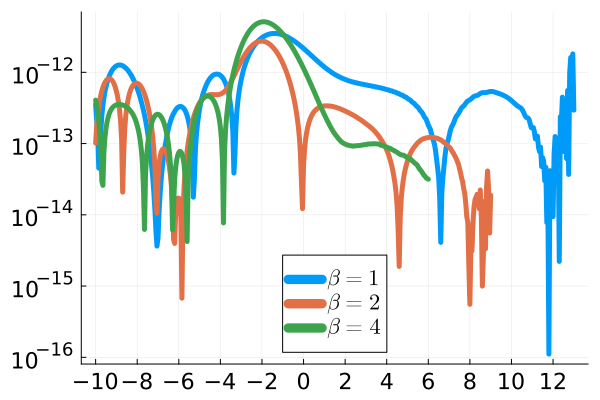

In [6]:
D1 = 13:-0.05:-10;
D2 = 9:-0.05:-10;
D4 = 6:-0.05:-10;
er_cdf = err_cdf(D1,D2,D4)

The following table shows the absolute errors for $x=0,\pm 2,\pm 4,\pm 6, \pm 8$ when $\beta=1,2,4$.

In [7]:
X = -8:2:6;
err = zeros(length(X),3);
B = [1,2,4];
V = 13:-0.05:-10;
for i = 1:length(B)
    global β = B[i]
    F_cdf = TW(β,x0=13.0/(sqrt(β)),method="spectral",step="bdf5")
    for j = 1:length(X)
        temp = X[j]
        ind = findall(x -> x == temp, V)[1]
        if β == 4
            err[j,3] = abs(F_cdf(temp/(2^(1/6))) - TW4[ind])
        elseif β == 1
            err[j,1] = abs(F_cdf(temp) - TW1[ind])
        elseif β == 2
            err[j,2] = abs(F_cdf(temp) - TW2[ind])
        end
    end
end
err1=err[:,1];err2=err[:,2];err4=err[:,3];

In [8]:
Table(x=X,β1=err1,β2=err2,β4=err4)

Table with 4 columns and 8 rows:
     x   β1           β2           β4
   ┌──────────────────────────────────────────
 1 │ -8  5.91169e-13  7.02291e-13  1.79272e-13
 2 │ -6  3.27842e-13  1.71036e-14  7.48824e-14
 3 │ -4  9.05697e-13  4.94259e-13  1.6926e-13
 4 │ -2  3.06882e-12  2.73953e-12  5.10025e-12
 5 │ 0   2.16249e-12  4.996e-14    1.13454e-12
 6 │ 2   7.92366e-13  2.86549e-13  9.85878e-14
 7 │ 4   5.71876e-13  8.11573e-14  8.9373e-14
 8 │ 6   1.81855e-13  1.21458e-13  3.16414e-14

### Error plots with respect to $\left|\Delta x\right|$ and $M$

The following plots show how the absolute error (CDF) over the entire domain $x\in\left[-10,\lfloor 13/\sqrt{\beta}\rfloor\right]$ changes when $\left|\Delta x\right|$ decreases and $M$ increases for a fixed value of $\beta$. $\Delta x=-0.2,-0.1,-0.05$ and $M=8000$ are used.

The following are high-precision values of the Tracy-Widom distribution function for $\beta=2$ evaluated over the domain with step size $\Delta x=-0.2,-0.1,-0.05$ respectively.

In [9]:
TW2 = [0.99999999999999999999999999999970286935056734,0.99999999999999999999999999999957162850397349,0.99999999999999999999999999999938283542575392,0.99999999999999999999999999999911143703696282,0.99999999999999999999999999999872155603289896,0.99999999999999999999999999999816185003979934,0.99999999999999999999999999999735889659911309,0.99999999999999999999999999999620777091013871,0.99999999999999999999999999999455863460332736,0.99999999999999999999999999999219766046324101,0.99999999999999999999999999998881992044079487,0.99999999999999999999999999998399087868192439,0.99999999999999999999999999997709173976197120,0.99999999999999999999999999996724193913864529,0.99999999999999999999999999995318929526803006,0.99999999999999999999999999993315444420424134,0.99999999999999999999999999990461068971345039,0.99999999999999999999999999986397268302261802,0.99999999999999999999999999980615649741321124,0.99999999999999999999999999972395842630706723,0.99999999999999999999999999960717845101964126,0.99999999999999999999999999944138433977464837,0.99999999999999999999999999920617032437452319,0.99999999999999999999999999887270547314670461,0.99999999999999999999999999840028457399368740,0.99999999999999999999999999773147927890090934,0.99999999999999999999999999678532652741193684,0.99999999999999999999999999544776690672538928,0.99999999999999999999999999355823267671199381,0.99999999999999999999999999089084906419862789,0.99999999999999999999999998712810508626108525,0.99999999999999999999999998182400503687589343,0.99999999999999999999999997435253669253424949,0.99999999999999999999999996383565972264276641,0.99999999999999999999999994904275140079203783,0.99999999999999999999999992825030291523560639,0.99999999999999999999999989904630214266387707,0.99999999999999999999999985805770395584082527,0.99999999999999999999999980057103794529266218,0.99999999999999999999999972000465593937682940,0.99999999999999999999999960717516733320769198,0.99999999999999999999999944927858486350021708,0.99999999999999999999999922847632139344629142,0.99999999999999999999999891993430266022675750,0.99999999999999999999999848910579045550119966,0.99999999999999999999999788796915216731165738,0.99999999999999999999999704982269861669076798,0.99999999999999999999999588208880822865875826,0.99999999999999999999999425637378179748855918,0.99999999999999999999999199474763715053393248,0.99999999999999999999998885082126395538455930,0.99999999999999999999998448366872091720154613,0.99999999999999999999997842191781375924756535,0.99999999999999999999997001434146676032941689,0.99999999999999999999995836192929127938100535,0.99999999999999999999994222457206661609497607,0.99999999999999999999991989297364736214153823,0.99999999999999999999988901297379786536340563,0.99999999999999999999984634479468475629737815,0.99999999999999999999978743337063398126775345,0.99999999999999999999970615728663952820145569,0.99999999999999999999959411212701578652829394,0.99999999999999999999943976812925151767910395,0.99999999999999999999922732047611790112885477,0.99999999999999999999893512135555457743086952,0.99999999999999999999853354339872219667507399,0.99999999999999999999798207067426075062089191,0.99999999999999999999722534123550658886073180,0.99999999999999999999618776779313003478455333,0.99999999999999999999476623170514698031260786,0.99999999999999999999282016845948478115074412,0.9999999999999999999901581245284590,0.9999999999999999999865195449688642,0.9999999999999999999815501204453019,0.9999999999999999999747684440975112,0.9999999999999999999655209529899467,0.9999999999999999999529210892987597,0.99999999999999999993576722437265693,0.99999999999999999991243202654461360,0.99999999999999999988071346446629559,0.99999999999999999983763431380003569,0.99999999999999999977917260037071481,0.99999999999999999969989950154261925,0.99999999999999999959249335520225628,0.99999999999999999944708795136624103,0.99999999999999999925039935794173580,0.99999999999999999898455704090577098,0.99999999999999999862554050444545340,0.99999999999999999814109015360268121,0.99999999999999999748791801015255475,0.99999999999999999660798692392422446,0.99999999999999999542355159113707123,0.99999999999999999383055520936978077,0.99999999999999999168984434742596532,0.99999999999999998881549160743643748,0.99999999999999998495928784457270445,0.99999999999999997979016600996310201,0.99999999999999997286692479109221705,0.99999999999999996360210304040615207,0.9999999999999999512141775769762668,0.9999999999999999346643679306838850,0.9999999999999999125731677351540281,0.9999999999999998831102002964937101,0.9999999999999998438490070292219855,0.9999999999999997915757814821446301,0.9999999999999997220376766238080116,0.9999999999999996296119034986998930,0.9999999999999995068711010246822327,0.9999999999999993440129967306968719,0.99999999999999912811268997807111353,0.9999999999999988421433199530512732,0.9999999999999984636945904967772001,0.9999999999999979632975329075880613,0.9999999999999973022366097750938566,0.99999999999999642969501943110803770,0.9999999999999952790335734751627294,0.9999999999999937629448734987246224,0.9999999999999917671489806949710166,0.9999999999999891421995949067728427,0.99999999999998569284486891504693337,0.99999999999998116422664827864536291,0.9999999999999752239963096558078613,0.9999999999999674391619690211276415,0.9999999999999572461447748621365591,0.9999999999999439120911674958663218,0.99999999999992648493789034155386631,0.99999999999990372902494814563149401,0.9999999999998740421578973191451987,0.9999999999998353488834388225969811,0.9999999999997849632965038718401196,0.9999999999997194128613615634652193,0.99999999999963421240125741782697691,0.99999999999952357446204336689568005,0.99999999999938003852383176040624811,0.9999999999991939968188221155436647,0.9999999999989530885603532538981163,0.9999999999986414268821871897525842,0.99999999999823861333413527847653791,0.99999999999771848288962755679140264,0.99999999999704750748206384805459998,0.9999999999961827673409905410085590,0.9999999999950693759047322221850501,0.9999999999936372146762227742897262,0.99999999999179679761940799960131210,0.99999999998943403878018272210494898,0.99999999998640363955608004666801379,0.99999999998252074071884262109294537,0.99999999997755039557373510107744414,0.9999999999711943104149346984966509,0.9999999999630741616717305972742488,0.9999999999527106296655209623015989,0.99999999993949707916422042021824956,0.99999999992266655770765610206264045,0.99999999990125046273781629260606219,0.99999999987402683420435120157289258,0.9999999998394557438736117347682740,0.9999999997955986558291705674121192,0.9999999997400179001051071061533386,0.99999999966965150338211309505667035,0.99999999958065752136873468890865371,0.99999999946822067366675736036634125,0.99999999932631244153938119880576823,0.99999999914739378950536388012573063,0.9999999989220472380019222060775898,0.9999999986385220565680885696763661,0.9999999982821727575687372713102205,0.99999999783476672106082532546592381,0.99999999727363151908562454567928224,0.99999999657060615061638170851565881,0.99999999569075273077736291664193359,0.99999999459077594411543064807234873,0.99999999321708646939223248425832028,0.9999999915034312559508418205877193,0.9999999893679975592937587999564785,0.99999998670987853272049824957046758,0.99999998340476534426710419959076575,0.99999997929970356706479529137764734,0.99999997420671918672311028844234966,0.99999996789508106161320832461726475,0.99999996008192099233552679219293573,0.99999995042087846668952981268650500,0.9999999384883732143267777102904833,0.9999999237670332799857976761827106,0.99999990562571750712712550709104330,0.99999988329546693742306184522828449,0.99999985584059718573491051208729478,0.99999982212400050555922725130165645,0.99999978076555878882243344450238076,0.99999973009237348909364037950903401,0.99999966807929128849089173771152748,0.99999959227794059756511715032673161,0.9999994997321884723265662615555163,0.99999938687757443186798030159907414,0.99999924942187048800955801730933007,0.99999908220344828276004410286146811,0.99999887902359666316260061653083091,0.99999863244831763259634509401965201,0.99999833357442593913231844454909879,0.99999797175397732955391654648576573,0.99999753427014164785654549864799439,0.99999700595660764830777602188667183,0.9999963687514440526889098521378260,0.99999560117503277821967350020777518,0.99999467772022161530782150030202503,0.99999356814120075815832796303362927,0.99999223662577609378653734386691618,0.99999064083367768458802582246656528,0.99998873078129043748656761851639608,0.99998644755071227476773383108824085,0.99998372179832113991150481781437053,0.99998047203505556262676889822418265,0.999976602647376336726311496665959283,0.9999720016243743360599610990140241,0.99996653795272080805911998965012147,0.99996005863712581508403333339519780,0.99995238529968808376957783754155525,0.99994331030700290347087723331834433,0.99993259236917004676063747817251482,0.99991995154994721240523324596710654,0.99990506362227410636792949572580748,0.99988755369830917292503013552363448,0.999866989058051386393123083595831666,0.999842871095656428486864043721922724,0.9998146262978115876334771737146291,0.99978159616413870437038685948460643,0.99974302597570326687782410509886434,0.99969805231449755917414779453066609,0.99964568923443845397536806697832488,0.99958481298320344747793815484149605,0.99951414517437530791318129086436889,0.99943223431115567010961978658966345,0.99933743556664570277892205585382652,0.99922788873170595532700548161894529,0.999101494250047245743621742070227839,0.998955887271837260245675964329911145,0.998788409672113595861139914553131360,0.99859607999906026178700289069702680,0.99837556134011726968946511327321306,0.99812312712132786333641783192455703,0.99783462488764003413191165568773830,0.99750543814938924937915311886514850,0.99713044642317037151188291440939305,0.99670398364396639887153947387650816,0.99621979517986495792590357379035566,0.99567099374098312797516306374754749,0.995050014540236699446850840384540798,0.994348570135085885056162994073101008,0.993557605455953045922232164610595577,0.992667253608036806442251761710235050,0.99166679311792749718382624239806231,0.99054460738371642211624184325919236,0.98928814717589229417750306331334691,0.98788389712467540512743297399659753,0.98631734721572382081795223774942877,0.98457297039824929991048380916058877,0.98263420748512296490529182446466546,0.98048346059088863276343849187645143,0.978102096407850044596089743723677019,0.975470460659461909975302999428033388,0.972567905090872172848814862701064469,0.969372828355262668349878249450813783,0.965862732128205670444214026412010792,0.962014293727226494426293793008594480,0.95780345642690983631739444809599274,0.95320553853823352391657195741500423,0.94819536216175476054605938905525878,0.94274740232571327887442497537043997,0.93683595698060094303901591516086044,0.93043533804061540754415175060190855,0.92352008333993706435491516925083741,0.91606518900928719650123545544380650,0.908046361378286712540267586312903094,0.899440287075599910407062762124089792,0.890224919536982368352909424241876292,0.880379779647887357051712553266204210,0.869886267750440283856316708834677446,0.858727983744051969694782495656929922,0.846891051515791333888497422657584222,0.83436444346322754933523594299601019,0.82114030043221390707880979505557122,0.80721424199928529247895828799668893,0.79258566169776164272620401037294969,0.77725800153321801167396685622091495,0.76123899997233672292575379956982297,0.74454090753316793312921926642993742,0.727180664167071818023742315904039212,0.709180032813844688821242031887026305,0.690565683840102696034681288559795521,0.671369225542344416534095327086832756,0.651627176512240197619472936550385720,0.631380876420726046623317111710812806,0.610676332673295697693703687155308341,0.589564001410871456465609979594149208,0.5680985024635560078428450914230224728,0.546338269088593005556957845375915694,0.52434513461476567339839088688968482,0.50218385944499036092636341567330997,0.47992160320530689800043878555144491,0.45762734813740488478179234612552375,0.43537128107702947907802033833091987,0.413224142505122554688080761371718196,0.391256552165870768847454270678287686,0.369538321581174588740553807623807910,0.348137764422685833918554949567029740,0.327121016103090953037278566532784072,0.306551374095921429715306092628935222,0.2864886703727091262457961239247390280,0.2669886869502331914963666812855182738,0.2481026248696757234667387999513819423,0.2298766359931581955465447575311066229,0.2123514258195901062911634358606339630,0.1955619341177650986804614827904712167,0.1795370985848360006310446235124866066,0.16429970500428924047126695253952331,0.14986632554659676655904978506941991,0.136247344979245317832575675576178811,0.123447072684565669501417426617270831,0.11146393657785845641430796399289671,0.100290753327304245070639573902095777,0.089915067750057726834227905429054208,0.0803195529393345480813718927988022907,0.0714824616016831176405323256288443780,0.0633781182799869584989900176433908434,0.0559774416245360351795522568982886855,0.0492484856600454849817701485864752253,0.0431569890787265544470547932122067903,0.03766692195623666388984243804198499651,0.0327410199169029631420107797751451874,0.02834129663698343552732296000290463550,0.02442952663287492759729267365657191075,0.02096769149276654325127495407444981496,0.01791838402949404846638209026312792933,0.015245166212007527593770563706580738,0.0129128781261011085137721998669613320,0.0108878965773404488105691482687187627,0.0091383432398732579065169857115534999,0.0076342434387664992031247085514569927,0.0063476377018357024460208209115859039,0.0052526491079020535145484628280986715,0.00432551017780042868234669993600437523,0.00354455359550920029634039650405926689,0.00289017140984955965264866761281369349,0.002344747559159293737445943166901285440,0.001892568594630828791921223854550519157,0.001519717369597376886459862504407315606,0.001213954232299596718521016327556578841,0.000964589931069064860123887902890797482,0.000762354036898338364272127396688777860,0.000599262232380874199360116038187408156,0.000468485330258251315383629475680463088,0.0003642223896787062398689015800238279532,0.0002815798116215560654205088207645872250,0.0002164578317339570010039716134803532426,0.0001654454008817060685560051481122314039,0.000125724059679525299903249623754404660,0.000094981078721558182994161449391330576,0.000071331853944087341088148060862567238,0.000053251316805492097432484613994485412,0.0000395139399741869590208820530957239955,0.0000291417875464184779559609512921404701,0.0000213599698474111576987229932670892233,0.0000155588111996301877070134983272421573,0.00001126201887418274015305299532597178713,8.10014691390734123570568049892163304*10^-6,5.78867397252676539895524020793379961*10^-6,4.110054507736757339849374051788543*10^-6,2.899152907740745840254085301130080589*10^-6,2.031526374597919552600200906614940985*10^-6,1.414081268862618902073386782571652044*10^-6,9.77686450112423432912933570078912375*10^-7,6.71383878986541016767449376830636069*10^-7,4.578899105545040485090937978641801456*10^-7,3.101293444111841051948650641384289270*10^-7,2.085878663349801906719870354801751645*10^-7,1.393068237258114651548833886815570400*10^-7,9.237738904321291746112678013780895242*10^-8,6.08193395245629889544825832903741247*10^-8,3.975330313442857057447241968145523*10^-8,2.5794851307789022410993158428065457*10^-8,1.66147537863521369240233024055007786*10^-8,1.06225467412445106877418846129809452*10^-8,6.7407782478617795710262134206109028*10^-9,4.2453242784591771888538295831841106*10^-9,2.65340736501658602911478900405508567*10^-9,1.64574300231219816082105978446329837*10^-9,1.012879836611529756097259690033866505*10^-9,6.18535247657101039936883390428185439*10^-10,3.74761008035561223545047282892370946*10^-10,2.252685489259147031411788292643571720*10^-10,1.343308442018510314614452719671306546*10^-10,7.9460766307273416834325479703711477*10^-11,4.662344716963896666926853336500071232*10^-11,2.713335170078879794117591685253207402*10^-11,1.566111745018843843219810733622505793*10^-11,8.96468627206015312793168017511145400*10^-12,5.088775601479399158472386469198007281*10^-12,2.864376953641525945300859927969287183*10^-12,1.598668869878906722580460273326782869*10^-12,8.84649333873614130022036136098747348*10^-13,4.853341977902429894681281797297567599*10^-13,2.639614767246062259530837959039724801*10^-13,1.4231246350087920323156900616615841547*10^-13,7.605379181197913057528809527232939235*10^-14,4.0285352783149488936360890449877413*10^-14,2.114923452886899975804206912870243*10^-14,1.10036339948575439269362387965256612*10^-14,5.6734135293529922430544032754764871*10^-15,2.89862734121458372762210533505604830*10^-15,1.46741444679730924928266634956573751*10^-15,7.36035022832541687594756478334161810*10^-16,3.65765109256283696089127035000124886*10^-16,1.800681902089248121562663647324653674*10^-16,8.78163691724009225536141761304400816*10^-17,4.24219406035905811539606322160142043*10^-17,2.029808134774723310045800764898150191*10^-17,9.61926023443806914915900326647021912*10^-18,4.514643003995683270661412226535743409*10^-18,2.098326356813695334579010068815458702*10^-18,9.657469975816453247063270687824558403*10^-19,4.401160786193092335339948649922051385*10^-19,1.985900425763657476861201334379488761*10^-19,8.87170103503467417641391855254327460*10^-20,3.923632763971210239644229524631061461*10^-20,1.717808161312865701948520968175470077*10^-20,7.444553527846986992744848502424014489*10^-21,3.193398883995186862200868819576214651*10^-21,1.3557856414815268131100196530340083342*10^-21,5.696722598906334767403668768855414487*10^-22,2.3687985438981351167568457920790435854*10^-22,9.747046305277220447740347974076480841*10^-23,3.9685568962885528322250710928336121261*10^-23,1.5987468679232989355643443802520014389*10^-23,6.3721670176048496573483601355453102*10^-24,2.5126255796452414897958341460060130*10^-24,9.8010909884321844723102076632118590*10^-25,3.7818118507731703943026874993353506*10^-25,1.44336810730704342623552014737514313*10^-25,5.44852335116169587656347851317087985*10^-26,2.03412618220821613522643077695764370*10^-26,7.5101249338245674975948975583240022*10^-27,2.74194961004314780464535455101983952*10^-27,9.89891625556136511198185767454027447*10^-28,3.533495495991654368532907295901589554*10^-28,1.247047463146967795608909692269443009*10^-28,4.351067412981999549597573756745136461*10^-29,1.500775970159965458189868711655810728*10^-29,5.11700672929013668797159338515881783*10^-30,1.724523090394892772755646952994948774*10^-30,5.744441138785222690925901058220806776*10^-31,1.891146346719754168793321946694469695*10^-31,6.15281584785220404220975657308675279*10^-32,1.978185256531839296181982298683977570*10^-32,6.284592316047947937954500943651471484*10^-33,1.972773411331448441553533187505190908*10^-33,6.118431321533854161989212326276330260*10^-34,1.8747294518594622637370619582982693386*10^-34,5.674735000457657612018081249790016212*10^-35,1.6968126046991382313383687452517761191*10^-35,5.011599214201208322290784982746603692*10^-36,1.4619946398556639804307528671471305288*10^-36,4.212259009651785311247682839301912149*10^-37];

In [10]:
TW22 = TW2[81:end];

In [11]:
TW22s = TW22[1:2:end];

In [12]:
TW222s = TW22[1:4:end];

In [13]:
function err_cdfc()
    er_cdfc=Plots.plot();
    delta_x=[-0.2,-0.1,-0.05];
    for j=1:length(delta_x)
        dx=delta_x[j];
        xs,F_cdf=TW(2;Δx_s=dx,interp=false,method="spectral",step="bdf5")
        err=zeros(length(xs),1)
        for i=1:length(xs)
            temp=xs[i]
            ind=findall(x -> x == temp, xs)[1]
            if dx == -0.05
                err[i]=abs(F_cdf[ind]-TW22[i])
            elseif dx == -0.1
                err[i]=abs(F_cdf[ind]-TW22s[i])
            elseif dx == -0.2
                err[i]=abs(F_cdf[ind]-TW222s[i])
            end
        end
        for i=1:length(xs)
            if err[i]<10^(-16)
                err[i]=10^(-16)
            end
        end
        if j==1
            er_cdfc=Plots.plot!(xs,err,lw=5,label=L"$\Delta x=-0.2$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],
                xticks=ceil(xs[end]):2:floor(xs[1]),legend=:bottom)
        elseif j==2
            er_cdfc=Plots.plot!(xs,err,lw=5,label=L"$\Delta x=-0.1$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],
                xticks=ceil(xs[end]):2:floor(xs[1]),legend=:bottom)
        elseif j==3
            er_cdfc=Plots.plot!(xs,err,lw=5,label=L"$\Delta x=-0.05$",yaxis=:log10,xtickfontsize=15,ytickfontsize=15,legendfontsize=15,
                yticks=[10^(-16),10^(-14),10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],
                xticks=ceil(xs[end]):2:floor(xs[1]),legend=:bottom)
        end
    end
    return er_cdfc
end

err_cdfc (generic function with 1 method)

For $\beta=2$, we have

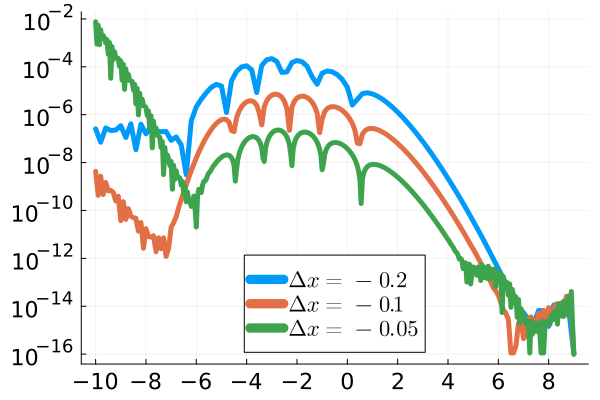

In [14]:
ers_cdfc=err_cdfc()

### Order of error plot

The following plot shows the order of error of the spectral discretization (CDF) using trapezoidal method for $\beta=2$, $x_{0}=\lfloor 13/\sqrt{\beta}\rfloor=9$, at $x=-2$ before interpolation with $M=8000$. We treat the case $\Delta x=-0.001$ as the reference to compare with. $\Delta x=-0.05,-0.04,-0.025$ are used.

In [15]:
β=2;
xx=-2;
result_ref=TW(β;method="spectral",step="trapz",interp=false,Δx_s=-0.001);
x_ref=result_ref[1];F_ref=result_ref[2];ind=findall(x -> x == xx, x_ref)[1];

In [16]:
del_x=[-0.05,-0.04,-0.025];
err=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf=TW(β;method="spectral",step="trapz",interp=false,Δx_s=dx);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind2=findall(x -> x == xx, x_cdf)[1];
    err[i]=abs(F_cdf[ind2]-F_ref[ind]);
end

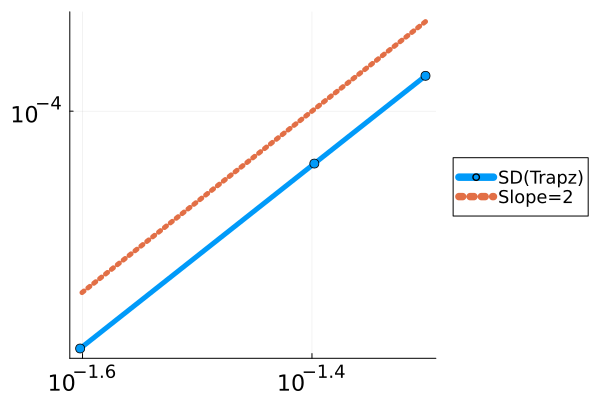

In [17]:
p=Plots.plot();
p=plot!(del_x.*(-1),vec(err),lw=5,label="SD(Trapz)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p=plot!(del_x.*(-1),10^(-1.2)*(del_x.*(-1)).^(2),lw=5,label="Slope=2",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the case using BDF3, $\Delta x=-0.05,-0.04,-0.025$ are used.

In [18]:
β=2;
xx=-2;
result_ref3=TW(β;method="spectral",step="bdf3",interp=false,Δx_s=-0.001);
x_ref3=result_ref3[1];F_ref3=result_ref3[2];ind3=findall(x -> x == xx, x_ref3)[1];

In [19]:
del_x=[-0.05,-0.04,-0.025];
err3=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf=TW(β;method="spectral",step="bdf3",interp=false,Δx_s=dx);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind32=findall(x -> x == xx, x_cdf)[1];
    err3[i]=abs(F_cdf[ind32]-F_ref3[ind3]);
end

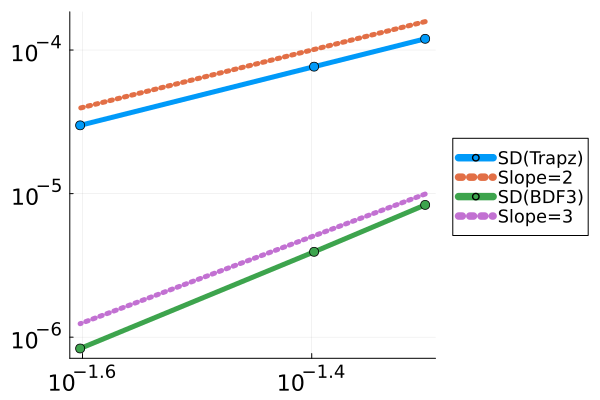

In [20]:
p=plot!(del_x.*(-1),vec(err3),lw=5,label="SD(BDF3)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p=plot!(del_x.*(-1),10^(-1.1)*(del_x.*(-1)).^(3),lw=5,label="Slope=3",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the case using BDF4, $\Delta x=-0.05,-0.04,-0.025$ are used.

In [21]:
β=2;
xx=-2;
result_ref4=TW(β;method="spectral",step="bdf4",interp=false,Δx_s=-0.001);
x_ref4=result_ref4[1];F_ref4=result_ref4[2];ind4=findall(x -> x == xx, x_ref4)[1];

In [22]:
del_x=[-0.05,-0.04,-0.025];
err4=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf=TW(β;method="spectral",step="bdf4",interp=false,Δx_s=dx);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind42=findall(x -> x == xx, x_cdf)[1];
    err4[i]=abs(F_cdf[ind42]-F_ref4[ind4]);
end

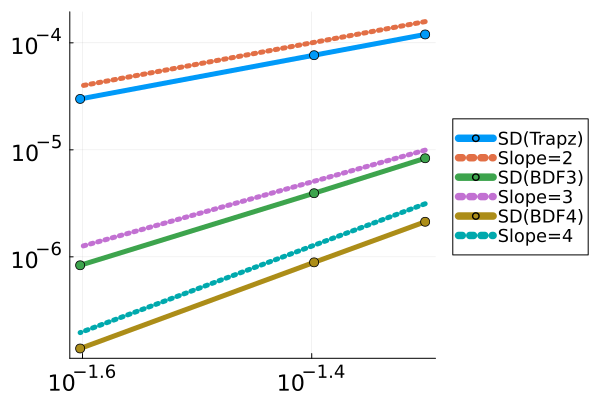

In [23]:
p=plot!(del_x.*(-1),vec(err4),lw=5,label="SD(BDF4)",legend=:outerright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=12)
p=plot!(del_x.*(-1),10^(-0.3)*(del_x.*(-1)).^(4),lw=5,label="Slope=4",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the case using BDF5, $\Delta x=-0.25,-0.2,-0.1$ are used.

In [24]:
β=2;
xx=-2;
result_ref5=TW(β;method="spectral",step="bdf5",interp=false,Δx_s=-0.001);
x_ref5=result_ref5[1];F_ref5=result_ref5[2];ind5=findall(x -> x == xx, x_ref5)[1];

In [25]:
del_x=[-0.25,-0.2,-0.1];
err5=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf=TW(β;method="spectral",step="bdf5",interp=false,Δx_s=dx);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind52=findall(x -> x == xx, x_cdf)[1];
    err5[i]=abs(F_cdf[ind52]-F_ref5[ind5]);
end

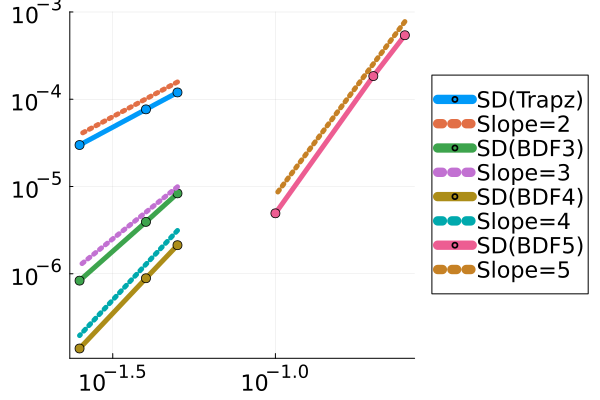

In [26]:
p=plot!(del_x.*(-1),vec(err5),lw=5,label="SD(BDF5)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
p=plot!(del_x.*(-1),10^(-0.1)*(del_x.*(-1)).^(5),lw=5,label="Slope=5",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

The following plot shows the case using BDF6, $\Delta x=-0.44,-0.25,-0.22$ are used.

In [27]:
β=2;
xx=-2;
result_ref6=TW(β;method="spectral",step="bdf6",interp=false,Δx_s=-0.001);
x_ref6=result_ref6[1];F_ref6=result_ref6[2];ind6=findall(x -> x == xx, x_ref6)[1];

In [28]:
del_x=[-0.44,-0.25,-0.22];
err6=zeros(1,length(del_x));
for i=1:length(del_x)
    dx=del_x[i];
    result_cdf=TW(β;method="spectral",step="bdf6",interp=false,Δx_s=dx);
    x_cdf=result_cdf[1];F_cdf=result_cdf[2];
    ind62=findall(x -> x == xx, x_cdf)[1];
    err6[i]=abs(F_cdf[ind62]-F_ref6[ind6]);
end

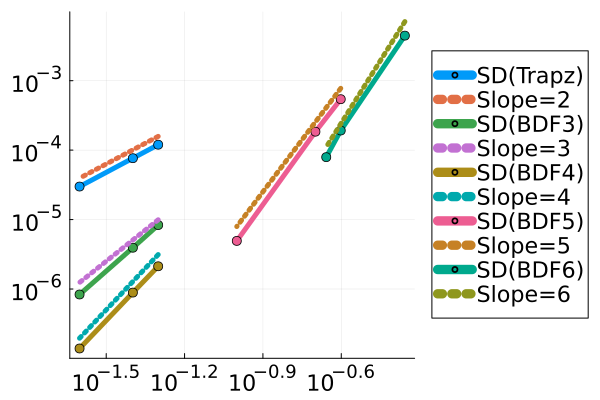

In [29]:
p=plot!(del_x.*(-1),vec(err6),lw=5,label="SD(BDF6)",legend=:bottomright,yaxis=:log10,xaxis=:log10,yticks=[10^(-16),10^(-15),10^(-14),
        10^(-13),10^(-12),10^(-11),10^(-10),10^(-9),10^(-8),10^(-7),10^(-6),10^(-5),10^(-4),10^(-3),10^(-2),10^(-1),1,10],
    marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
p=plot!(del_x.*(-1),10^(-0.01)*(del_x.*(-1)).^(6),lw=5,label="Slope=6",yaxis=:log10,xaxis=:log10,ls=:dot,legend=:outerright)

### Error plots with respect to $x_{0}$

The following plot shows the absolute error of BDF5 after interpolation over $x=-8,-7,\cdots,x_{0}$ with respect to $x_{0}$. $\beta=1,2,4$, $x_{0}=13,12,11,10,9,8,7,6,5,4,3,2$.

In [30]:
TW4 = [-2.574888392460305795122132602283250619390264383239676521888421135088679529549212527*10^-36,4.402674550991342537185592131001736469178851920963801726793127991457336550558987664*10^-22,1.143215750649091122069845013136160833697857536843154450106940777297625766122031395*10^-13,8.51301807688514454125351774951488146614016798275967297836405782711208969812021591*10^-8,0.000502072743527362930092215723446062225917032429718405709367693300659511905434249519,0.0653598692838841400003036114843829441479826138525965221003464392626850876085539952,0.5452752326130137385328376382300301319772829689948250598818069599157414875383186017,0.9456464856799623193424730754993378155844706695925790940734708293911623587609938534,0.9985741973581685402167048089588001725151497796528776329865471538507175619950599360,0.999990399496881048876133133637538307568751495381409573761366063573911607303272320,0.999999980361649638857796235694354098596605423234869632977804959561360187663516701,0.999999999986028151193326567062568767032968785206749039446005375664807284601385050,0.999999999999996160910724232392630483281593932502809261171248527536177491922333618,0.9999999999999999995577557564024624627157663777484793696193875405967078265931785490,0.99999999999999999999997719226626007644596096735971404710727495843067584148532096604812,0.99999999999999999999999999944431830933189365337200481792121699288247622418450197685995,0.99999999999999999999999999999999331098642000476962650694288711366872060079669751774338,0.99999999999999999999999999999999999995867576091686992541045229183200441101221499016345,0.99999999999999999999999999999999999999999986461612272421666055738971553438841303296449,0.99999999999999999999999999999999999999999999999975799109706091432573567272824770216316,0.99999999999999999999999999999999999999999999999999999975795149470680561809247113598280,0.99999999999999999999999999999999999999999999999999999999999986149312377000286345899697];

In [31]:
TW2 = [1.985900425763657476861201334379488760829392163990118371509824170565031728897943778*10^-19,2.6396147672460622595308379590397248007837855115582377005291328373567449490481530450*10^-13,1.06225467412445106877418846129809452169519677499499694047692587972576008483926245*10^-8,0.00002135996984741115769872299326708922325231764218880534325700489794070270744644728211,0.003544553595509200296340396504059266890198333653911294403207318845778851758033887110,0.0803195529393345480813718927988022907188829499028053796784468796982009298500041285,0.413224142505122554688080761371718196004467389478519013570048867377940492061113133,0.807214241999285292478958287996688928581732145396256692100604257018062203964494027,0.9693728283552626683498782494508137827306013366639174887003503248423948783198697170,0.997505438149389249379153118865148501014625106980935146651179946702802132444059115,0.999887553698309172925030135523634480071558427117812918992099236320214637084199097,0.999997005956607648307776021886671834916027075059204068335356759940847234952688033,0.999999950420878466689529812686505002474709093048964252017335731008051875893250448,0.999999999468220673666757360366341245545030883934605478877037881568340346060828403,0.99999999999618276734099054100855895299118853879428790420406187723434750707281242,0.999999999999981164226648278645362910151314867823598542389732039256858364587167496,0.99999999999999993466436793068388498461574214870866588197821212193700741761360189,0.999999999999999999837634313800035690159240899724293768881819303199720524611712241,0.99999999999999999999970615728663952820145568688040536940525204960942672046124468806167,0.99999999999999999999999960717516733320769197946117627254401080115664686718665110201120,0.99999999999999999999999999960717845101964126382533189894958864043874295763502953046497,0.99999999999999999999999999999970286935056733670174008925419157371444215526644866331081];

In [32]:
TW1 = [1.806827921192191248278880143332523828667007643810740728274212171282609879253090357*10^-12,5.482862591559699913414184024424072669354818711181850949275939826090648080461018418*10^-9,2.707319325304773040821000882102924490595972436549632042075093180239591117070766241*10^-6,0.0002779177549167903698016390969780283418718328881752742322247209844580891598297832081,0.007567678598796400521936599670665732806798488377180260107263488838855525232305624153,0.06960011886736988843622020223779165777774541996946646444171700793533950684220392168,0.2743201979092178576716310476127873226448971056706662362535487247044550925223384311,0.5837898955197322834588884463779472662251473386606027279329334085854380163058629736,0.8319080662029519274622193818646769042119909956466013558294134603367560074201932261,0.9514212369115507347956186295073144506041702552123970188686737738045822167783893485,0.9895975710848269920731970333538613391783696895350364246743608284561450660491230459,0.9982934803498805951655028956206699745633996744243089414843488585865029260988367531,0.9997796555125670013518272834840820629648348916065770121709609259714451767403037387,0.9999771284819556795622427891174769455667372453277406586221847579781954034055939177,0.9999980591859273537829011376652640243171421415783596403017151355252936374690019694,0.9999998635117948722183979877374723350744893297749818835627833090425712722802194198,0.9999999919545751201302614347447837482113688020072257335640829247132111095730148309,0.9999999995986651565037890552575943634549639204500892788142192879148784649881789567,0.99999999998291784130472893156411670956883845565367466428685290806024644466030284480158,0.99999999999937516373587901508840613140719132826227221071722567532543114485478526272951,0.99999999999998023427042478423261646979469576137427809733081451458427400754355978624678,0.99999999999999945623395600657715544651124820813894737744998542840441835701849993529412];

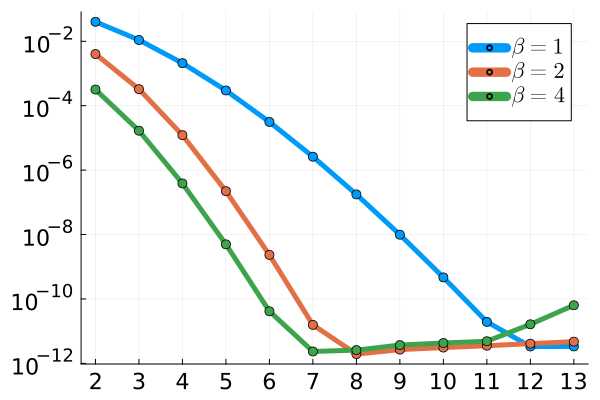

In [33]:
Beta=[1,2,4];
X=[13,12,11,10,9,8,7,6,5,4,3,2];
p=Plots.plot();
for i=1:length(Beta)
    global β=Beta[i]
    err=zeros(1,length(X))
    for j=1:length(X)
        x00=X[j]
        xx=-8:1:x00
        E=zeros(1,length(xx))
        xs,F_cdf=TW(β;x0=x00,interp=false, method = "spectral", step = "bdf5")
        if β==4
            for k=1:length(xx)
                temp=xx[k]
                ind=findall(x -> x == temp, xs)[1]
                E[k]=abs(F_cdf[ind]-TW4[k]);
            end
            err[j]=maximum(E)
        elseif β==2
            for k=1:length(xx)
                temp=xx[k]
                ind=findall(x -> x == temp, xs)[1]
                E[k]=abs(F_cdf[ind]-TW2[k]);
            end
            err[j]=maximum(E)
        elseif β == 1
            for k=1:length(xx)
                temp=xx[k]
                ind=findall(x -> x == temp, xs)[1]
                E[k]=abs(F_cdf[ind]-TW1[k]);
            end
            err[j]=maximum(E)
        end
    end
    if β==1
        p=plot!(X,vec(err),lw=5,label=L"$\beta=1$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    elseif β==2
        p=plot!(X,vec(err),lw=5,label=L"$\beta=2$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    elseif β==4
        p=plot!(X,vec(err),lw=5,label=L"$\beta=4$",legend=:topright,yaxis=:log10,xticks=X,yticks=[10^(-16),10^(-14),
            10^(-12),10^(-10),10^(-8),10^(-6),10^(-4),10^(-2)],marker=(:circle,5),xtickfontsize=15,ytickfontsize=15,legendfontsize=15)
    end
end
p